<a href="https://colab.research.google.com/github/PranavanBupathy/Comment-toxicity_NLP_BiLSTM/blob/main/Comment_toxicity_%7C_Supervised_Deep_learning_model_%7C_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The objective of the project is to identify the toxic comments using BidirectionalLSTM model.


1.   Install dependencies
2.   Preprocessing
3. Model creation
4. Evaluation
5. Gradio implementation



Install Dependencies


In [50]:
import tensorflow as tf
import pandas as pd  
import matplotlib 
import sklearn

In [3]:
import os #Used to work and navigate with filepath
import numpy as np

In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [15]:
df.iloc[10]['comment_text']

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [14]:
df[df.columns[2:]].iloc[10]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 10, dtype: int64

Preprocessing




In [16]:
from tensorflow.keras.layers import TextVectorization

In [27]:
#helps to embed the word into number like indexing

In [28]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [30]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [32]:
df[df.columns[2:]] #filtering only the label in the dataframe

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [33]:
#saving the comment and their label value inside the variable x and y
x = df['comment_text']
y = df[df.columns[2:]].values


In [34]:
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [35]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [36]:
MAX_FEATURES = 200000 #Number of words in the vocab

In [37]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')

In [43]:
vectorizer.adapt(x.values)#This learn all the word in the comments store as integer which is a vocalbory

In [44]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [45]:
vectorized_text = vectorizer(x.values)

In [47]:
len(x)

159571

In [48]:
vectorized_text #tokenised values and 0 are the padded parts

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

Tensorflow data pipeline that helps to format or standardise the dataset as needed

In [52]:
#MCSHBAP - map, chache, shuffle, batch, prefetch, from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #helps bottlenecks

In [55]:
batch_X, batch_Y = dataset.as_numpy_iterator().next() #shows example one batch

In [57]:
batch_X.shape

(16, 1800)

In [58]:
batch_Y.shape

(16, 6)

In [62]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [63]:
train_generator = train.as_numpy_iterator()

In [66]:
train_generator.next()

(array([[50268,     2,   421, ...,     0,     0,     0],
        [ 2587,     7,    20, ...,     0,     0,     0],
        [  850,   562,   179, ...,     0,     0,     0],
        ...,
        [  124,     7,   100, ...,     0,     0,     0],
        [44047,     5,  2005, ...,     0,     0,     0],
        [ 1112,   880,   179, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

Deep Learning Model 

In [72]:
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.models import Sequential

In [74]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1 ,32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(2560, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 2560)              330240    
                                                                 
 dense_2 (Dense)             (None, 128)               327808    
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [76]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [79]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
6981/6981 [==============================] - 696s 100ms/step - loss: 0.0488 - val_loss: 0.0412
Epoch 2/5
6981/6981 [==============================] - 673s 96ms/step - loss: 0.0430 - val_loss: 0.0380
Epoch 3/5
6981/6981 [==============================] - 720s 103ms/step - loss: 0.0388 - val_loss: 0.0353
Epoch 4/5
6981/6981 [==============================] - 675s 97ms/step - loss: 0.0345 - val_loss: 0.0311
Epoch 5/5
6981/6981 [==============================] - 776s 111ms/step - loss: 0.0311 - val_loss: 0.0284


In [80]:
history.history

{'loss': [0.04881938919425011,
  0.042984314262866974,
  0.03877662494778633,
  0.03452226519584656,
  0.031057076528668404],
 'val_loss': [0.041216328740119934,
  0.03800307959318161,
  0.03527313843369484,
  0.0311117060482502,
  0.028449980542063713]}

In [81]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

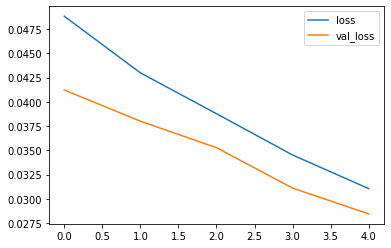

In [82]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

Prediction

In [83]:
input_text = vectorizer('You freaking suck!')

In [84]:
batch = test.as_numpy_iterator().next()

In [85]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [86]:
np.expand_dims(input_text, 0)

array([[   7, 7158,  397, ...,    0,    0,    0]])

In [87]:
res = model.predict(np.expand_dims(input_text, 0))

Evalute Model

In [90]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [92]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [95]:
for batch in test.as_numpy_iterator():
  #Unpack the batch
  x_true, y_true = batch
  yhat = model.predict(x_true)

  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

In [98]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9098769426345825, Recall:0.7755101919174194, Accuracy:0.5145436525344849


Gradio

In [99]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 16.7 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 2.3 MB 53.5 MB/s 
     |████████████████████████████████| 140 kB 72.3 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 272 kB 65.8 MB/s 
     |████████████████████████████████| 212 kB 65.1 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 57.6 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 271 kB 69.5 MB/s 
     |████████████████████████████████| 144 kB 70.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 11.1 MB/s 
     |████████████████████████████████| 68 k

In [100]:
import gradio as gr

In [101]:
model.save('toxicity.h5')

In [ ]:
#model = tf.keras.models.load('toxicity.h5')

In [102]:
input_str = vectorizer('hey i freaken hate you!')

In [103]:
res = model.predict(np.expand_dims(input_str,0))

In [104]:
res

array([[0.82912236, 0.00107915, 0.03664744, 0.01149618, 0.3048977 ,
        0.03314237]], dtype=float32)

In [110]:
df.colunms[2:-1]

AttributeError: ignored

In [111]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    return text

In [112]:
interface = gr.Interface(fn=score_comment, inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'), outputs='text')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [113]:
interface.launch(share = True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11060.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f029597bd50>,
 'http://127.0.0.1:7861/',
 'https://11060.gradio.app')